In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
import json
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/supervisedMLKaggle')

Mounted at /content/drive


In [3]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1, inplace= True)

In [7]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [8]:
df = df.rename(columns={'v1':'target', 'v2': 'text'})

In [9]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df=df.dropna(how='any')

In [12]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [14]:
bar = pd.value_counts(df['target'].values, sort=True)

<Axes: >

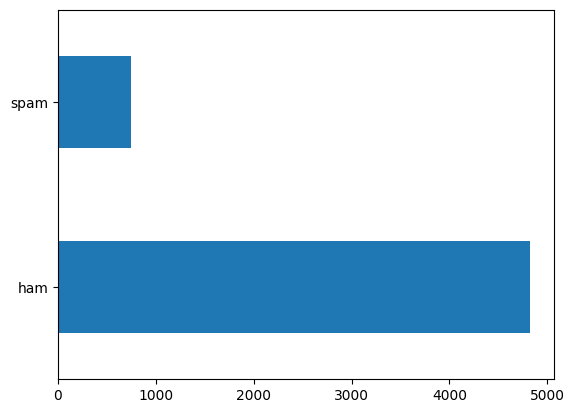

In [15]:
bar.plot.barh()


FEATURE ENGINEERING

In [16]:
df['total_word']= df['text'].apply(lambda x : len(x.split()))

In [17]:
df['total_word']

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: total_word, Length: 5572, dtype: int64

In [18]:
df

,target,text,total_word
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30
5568,ham,Will Ì_ b going to esplanade fr home?,8
5569,ham,"Pity, * was in mood for that. So...any other s...",10
5570,ham,The guy did some bitching but I acted like i'd...,26


In [19]:
def total_char(text):
  char= 0
  for i in text.split():
    char+=len(i)
  return char


In [20]:
df['total_char']= df['text'].apply(total_char)

In [21]:
df['total_char']

0        92
1        24
2       128
3        39
4        49
       ... 
5567    132
5568     30
5569     48
5570    100
5571     21
Name: total_char, Length: 5572, dtype: int64

In [22]:
df['text']=df['text'].map(lambda x : x.lower())

In [23]:
df['text']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: text, Length: 5572, dtype: object

In [24]:
df

,target,text,total_word,total_char
0,ham,"go until jurong point, crazy.. available only ...",20,92
1,ham,ok lar... joking wif u oni...,6,24
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,128
3,ham,u dun say so early hor... u c already then say...,11,39
4,ham,"nah i don't think he goes to usf, he lives aro...",13,49
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,30,132
5568,ham,will ì_ b going to esplanade fr home?,8,30
5569,ham,"pity, * was in mood for that. so...any other s...",10,48
5570,ham,the guy did some bitching but i acted like i'd...,26,100


In [25]:
df['text'] = df['text'].map(lambda x : re.sub('[,\.!?()"]', '', x))

In [26]:
def tokenization(text):
  text=nltk.tokenize.word_tokenize(text)
  return text

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
def perform_stemming(text):
  stemmer = PorterStemmer()
  new_list=[]
  words=tokenization(text)
  for word in words:
    new_list.append(stemmer.stem(word))
  return " ".join(new_list) + " "

In [29]:
df['text']=df['text'].apply(perform_stemming)

In [30]:
df

,target,text,total_word,total_char
0,ham,go until jurong point crazi avail onli in bugi...,20,92
1,ham,ok lar joke wif u oni,6,24
2,spam,free entri in 2 a wkli comp to win fa cup fina...,28,128
3,ham,u dun say so earli hor u c alreadi then say,11,39
4,ham,nah i do n't think he goe to usf he live aroun...,13,49
...,...,...,...,...
5567,spam,thi is the 2nd time we have tri 2 contact u u ...,30,132
5568,ham,will ì_ b go to esplanad fr home,8,30
5569,ham,piti * wa in mood for that soani other suggest,10,48
5570,ham,the guy did some bitch but i act like i 'd be ...,26,100


In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [33]:
text_data = df['text'].str.cat(sep=' ')
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text_data)

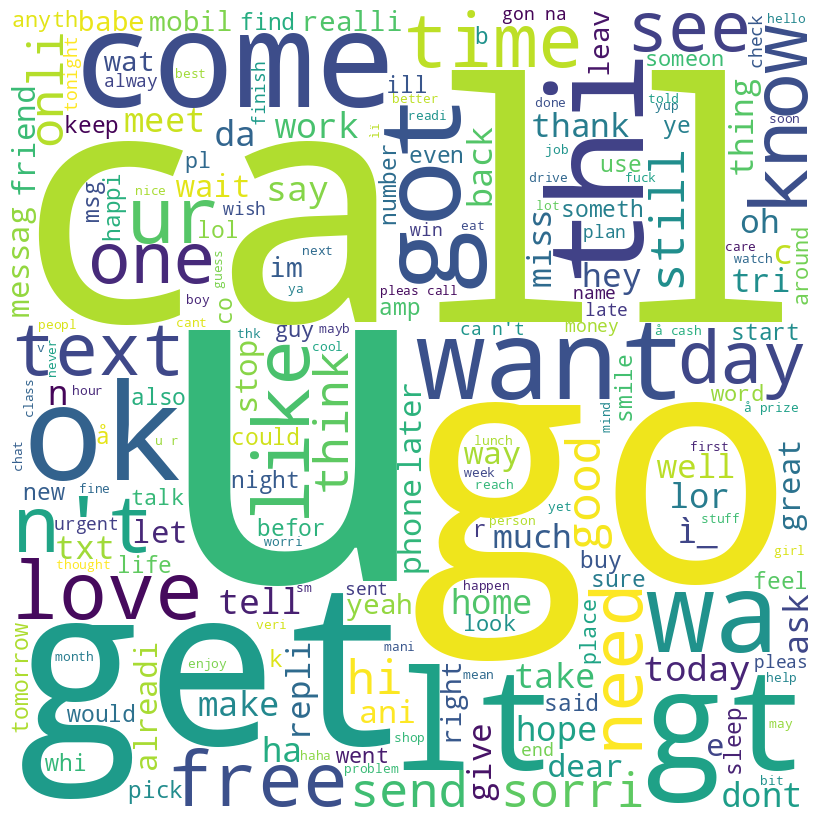

In [34]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Target variable:

In [35]:
df['target']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: target, Length: 5572, dtype: object

In [36]:
df['target']=df['target'].replace('ham', 1)

In [37]:
df['target']= df['target'].replace('spam', 0)

In [38]:
df['target'].value_counts()

target
1    4825
0     747
Name: count, dtype: int64

split dataset into X and y:

In [39]:
#X= df.iloc()

In [40]:
X = df.iloc[:,1].values

In [41]:
type(X)

numpy.ndarray

In [42]:
y=df['target'].values

In [43]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state=42, stratify= y)

In [45]:
tfidf = TfidfVectorizer(max_features= 2500) #min_df=1, max_df=1)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

Modeling:

Random Forest Classifier :

In [46]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
# Probabilités prédites
y_prob = model.predict_proba(X_test)

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
# Calcul de l'accuracy
accuracy = round(accuracy_score(y_test, y_pred), 3)

# Calcul de la précision
precision = round(precision_score(y_test, y_pred), 3)

# Calcul du rappel
recall = round(recall_score(y_test, y_pred), 3)

In [51]:
accuracy

0.975

In [52]:
precision

0.972

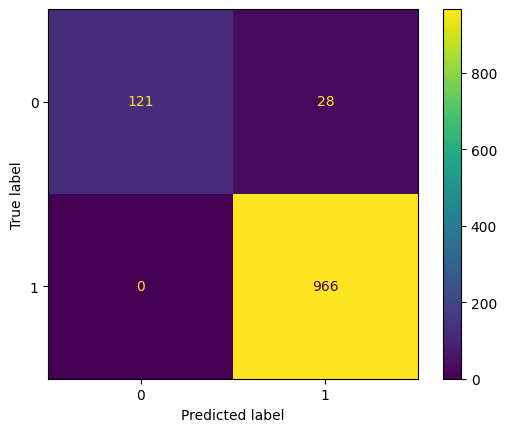

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [54]:
#sauvegarde du modèle et du transformateur TF-IDF:
import joblib

joblib.dump(model, 'model_nlp.pkl')
joblib.dump(tfidf, 'tfidf_nlp.pkl')


['tfidf_nlp.pkl']

In [55]:
from platform import python_version
print(python_version())


3.10.12


In [56]:
loaded_tfidf = joblib.load('tfidf_nlp.pkl')
loaded_model = joblib.load('model_nlp.pkl')
test_message = "Your free lottery ticket is waiting"
test_message=[test_message]
test_message_transformed = loaded_tfidf.transform(test_message).toarray()

In [57]:
prediction=loaded_model.predict(test_message_transformed)

In [58]:
prediction[0]

1

In [59]:
print(f"Prediction for test msg '{test_message}' :",'ham' if prediction[0]==1 else 'spam' )

Prediction for test msg '['Your free lottery ticket is waiting']' : ham


In [60]:
# Tester avec un message individuel
#loaded_tfidf = joblib.load('tfidf_nlp.pkl')
#loaded_model = joblib.load('model_nlp.pkl')

#test_message = "Your free lottery ticket is waiting"
#test_message_transformed = loaded_tfidf.transform([test_message]).toarray()
#prediction = loaded_model.predict(test_message_transformed)
#print(f"Prediction for test message '{test_message}':", 'ham' if prediction[0] == 1 else 'spam')

In [62]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1